<a href="https://colab.research.google.com/github/j2reigh/web-scraping-naver-news_20191106/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8A%A4%ED%84%B0%EB%94%94_20191207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import keras

In [0]:
### 라이브러리 확인
import numpy
import scipy
import sklearn
import matplotlib
import pandas
import pydot
import h5py

In [0]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils # 숫자가 0~9 벡터로 표현?
from keras.datasets import mnist # mnist 데이터셋 불러옴
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
x_test.shape

(10000, 28, 28)

In [37]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


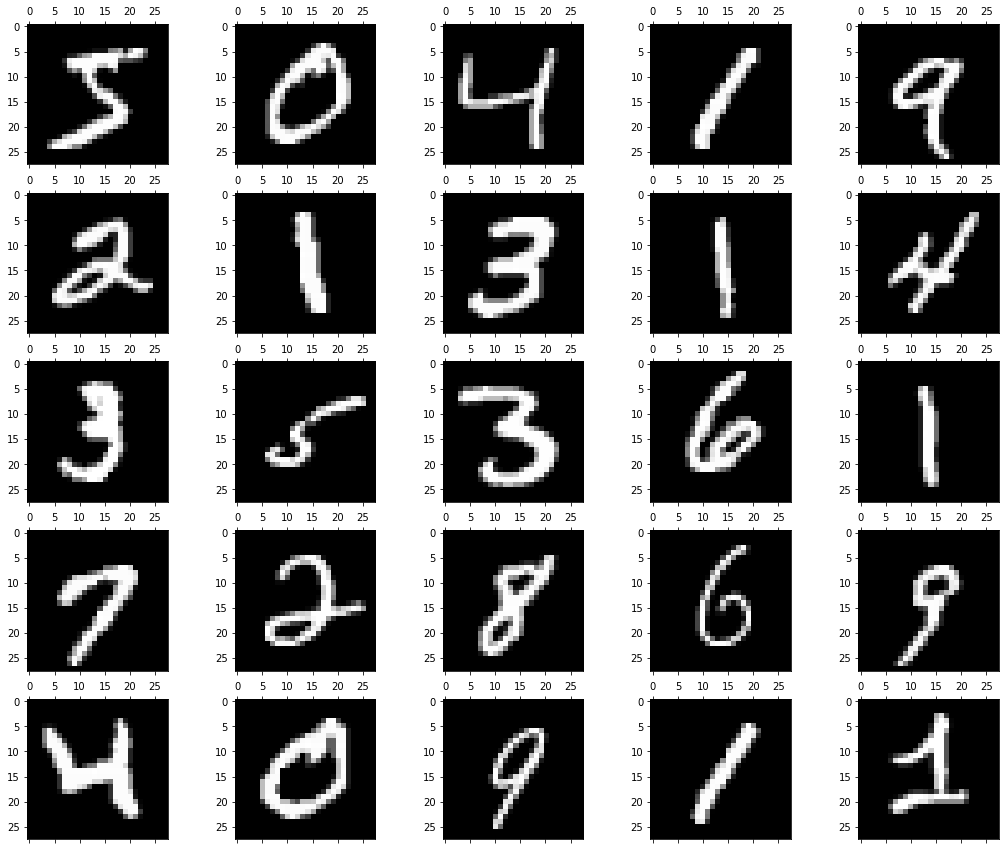

In [40]:
figure,axes = plt.subplots(nrows=5, ncols=5) # 3행 5열의 구조
figure.set_size_inches(18,15) # 전체 크기
plt.gray()
print("label={}".format(y_train[0:25])) # y데이터 0~14개 가져오기
col = 0
for row in range(0,5):
  col = row * 5
  axes[row][0].matshow(x_train[col]) # 0,5,10의 값을 갖는 위치 값 이미지 표시
  axes[row][1].matshow(x_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
  axes[row][2].matshow(x_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
  axes[row][3].matshow(x_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
  axes[row][4].matshow(x_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

In [0]:
# 데이터가 깨질 수도 있으니 복사해놓는다.

x_train_n = x_train.copy()
y_train_n = y_train.copy()
x_test_n = x_test.copy()
y_test_n = y_test.copy()

In [0]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0


In [43]:
print(y_train[0:5])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train[0:5]) ## 여러 번 실행시키면 점점 길어진다.

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax')) # 범주형 변수를 예측하려고 하는데 그 종류가 10개여서 마지막 노드가 10개이다.

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [52]:
# 4. 모델 학습시키기
# hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
hist = model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0849 - acc: 0.9759
Epoch 2/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0797 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0750 - acc: 0.9791
Epoch 4/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0706 - acc: 0.9802
Epoch 5/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0670 - acc: 0.9813
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0631 - acc: 0.9821
Epoch 7/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0600 - acc: 0.9837
Epoch 8/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0570 - acc: 0.9841
Epoch 9/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0546 - acc: 0.9847
Epoch 10/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0520 - a

In [53]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.08493485628600805, 0.07966353899187137, 0.07495161567755955, 0.07057614177522677, 0.06699648015619702, 0.0631114296540812, 0.059961051068135325, 0.05696891521512589, 0.05463112448839092, 0.05196182329969937]
[0.9759499956468741, 0.9776499957740307, 0.9791166628698508, 0.9802333295842012, 0.981299996227026, 0.9821499965687592, 0.9836666633884112, 0.984133330176274, 0.9846833302378655, 0.9856666638155778]


In [48]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 26us/step
## evaluation loss and_metrics ##
[0.10008125236593186, 0.9683]


[7 2]


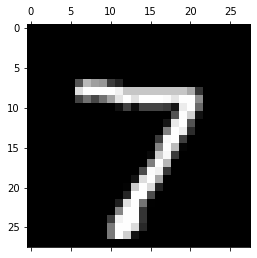

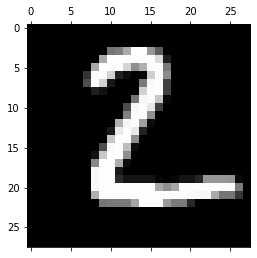

In [56]:
# 7. 모델 사용하기(2개 데이터 준비) - 변형되지 않은 데이터 확인해본다
print(y_test_n[0:2])
plt.matshow(x_test_n[0])
plt.matshow(x_test_n[1])

In [63]:
xhat = x_test[0:1]
xhat

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [64]:
yhat = model.predict(xhat) # 예측
print('## yhat ##')
print(yhat) # 예측된 확률(0-9)
print(yhat.argmax(1))

## yhat ##
[[9.14401608e-06 1.00597894e-07 1.19245728e-04 1.35446759e-03
  4.01223019e-08 7.50367164e-08 3.24066018e-09 9.98437583e-01
  3.08510243e-05 4.85878008e-05]]
[7]


In [61]:
!ls

DL_03_Cifar10.py  DL_py_Lab05_PythonClass05_Cifar10.pdf  sample_data  ship.jpg


In [62]:
!python DL_03_Cifar10.py

Using TensorFlow backend.
당신의 딥러닝 모델 이름은>>토순씨
170500096/170498071 [==============================] - 6s 0us/step
(50000, 1) (10000, 1)
(50000, 10) (10000, 10)
===================== 공부중
토순씨 는 열심히 공부중입니다...
===================== 공부중





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10


2019-12-07 12:58:06.212758: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2019-12-07 12:58:06.217982: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000160000 Hz
2019-12-07 12:58:06.218419: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2602bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-12-07 12:58:06.218461: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-12-07 12:58:06.221176: I tensorflow/stream_e